<a href="https://colab.research.google.com/github/gomes-lab/course-cs2770-2023sp/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For this exercise, first read the paper [An Introduction to Population Growth](https://www.nature.com/scitable/knowledge/library/an-introduction-to-population-growth-84225544/#) and then answer the questions below.

Note: Figure 4 of the paper does not fit the description. It should be replaced with the following figure from Plumb *et al*. 2009 :
![Figure 4](https://ars.els-cdn.com/content/image/1-s2.0-S0006320709002390-gr2.jpg)

**Question:** Provide definitions for the following terms: population size, population density, population growth, and carrying capacity. 

**Question:** List three factors that impact the growth rate of the population of an organism.


## Parameters of Logistic Equation

We saw from the paper that during the early stage of the expansion of a population, it is reasonable to assume that the population grows exponentially. However, since the amount of resource available is limited, the growth of a population will eventually slow down as the population approaches the carrying capacity. Thus, we introduce the logistic growth model to better describle this type of behavior. A logistic equation takes the form of  
$$f(t)=\frac{L}{1+e^{-k(t-t_0)}}.$$

For this section, we will explore the effects of changing the parameters of the logistic equation. Run the two cells below and answer the following question.

**Question:** What do $k$ and $L$ correspond to in a population growth model? What does the value of $t_0$ entail?


In [1]:
'''
Task: Run this cell to import all the necessary packages.
'''

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
plt.rcParams.update({'font.size': 14})

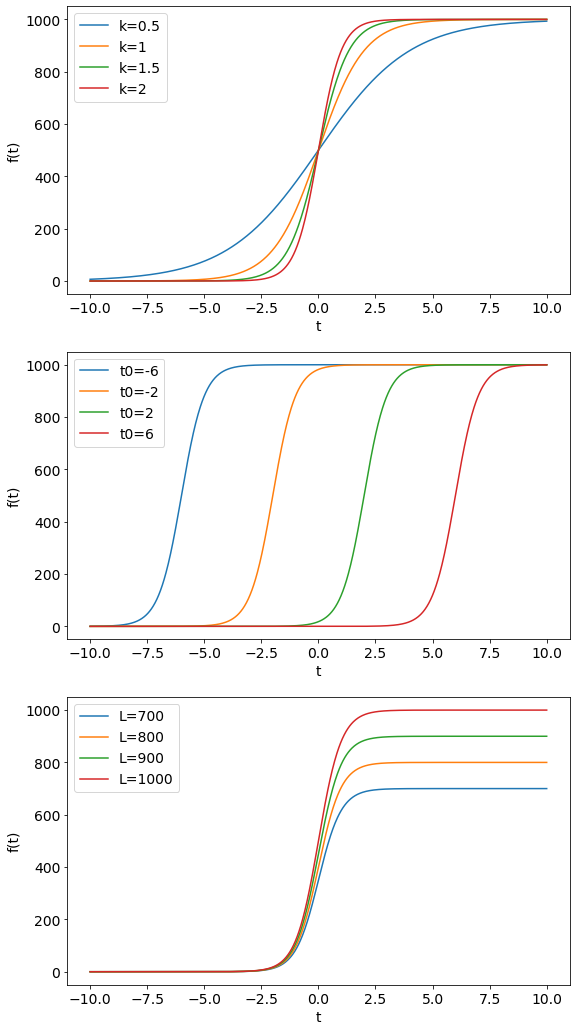

In [3]:
'''
Task: Run this cell.
'''
t = np.linspace(-10, 10, 1000)

fig = plt.figure(figsize=(9, 18))

ax = fig.add_subplot(3, 1, 1)
t0, L = 0, 1000
for k in [0.5, 1, 1.5, 2]:
    f = L / (1. + np.exp(-k * (t - t0)))
    ax.plot(t, f, label='k={}'.format(k))
ax.legend()
ax.set_xlabel('t')
ax.set_ylabel('f(t)')

ax = fig.add_subplot(3, 1, 2)
L, k = 1000, 2
for t0 in [-6 , -2, 2, 6]:
    f = L / (1. + np.exp(-k * (t - t0)))
    ax.plot(t, f, label='t0={}'.format(t0))
ax.legend()
ax.set_xlabel('t')
ax.set_ylabel('f(t)')

ax = fig.add_subplot(3, 1, 3)
t0, k = 0, 2
for L in range(7, 11):
    L *= 100
    f = L / (1. + np.exp(-k * (t - t0)))
    ax.plot(t, f, label='L={}'.format(L))
ax.legend()
ax.set_xlabel('t')
ax.set_ylabel('f(t)')
plt.show()

## Logistic Growth vs Exponential Growth

A logistic growth behaves like an exponential growth in the beginning. Consider a logistic equation with parameters $t_0 = 10, k = 0.5$ and $L = 3000$:  
$$f(t)=\frac{3000}{1+e^{-0.5(t-10)}}$$ and an exponential funtion $$g(t)=f(0)\cdot e^{rt}$$ 

**Question:** Experiment with the cell below and find a suitable value of $r$ so that $g(t)$ behaves like $f(t)$ for $0\leq t \leq 5$. Your answer only needs to be approximate and should not go to more than two decimal places.


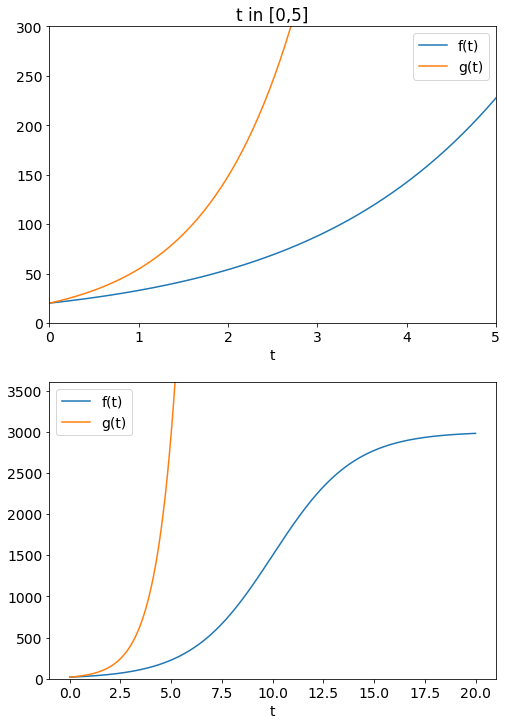

In [11]:
'''
Task: Experiment with this cell by changing the value of r. The two curves should almost overlap in the first figure.
'''
r = 1.0

##################Parameters of the logistic function, DO NOT CHANGE #################
t0 = 10 
k = 0.5 
L = 3000  
#####################################################################################

t=np.linspace(0,20,num = 1000)
f=L/(1+np.exp(-k*(t-t0)))
g=f[0]*np.exp(r*t)


fig = plt.figure(figsize=(8, 12))
#plot the two curves for t in [0,5]
ax = fig.add_subplot(2, 1, 1)
ax.plot(t,f,label='f(t)')
ax.plot(t,g,label='g(t)')
ax.legend()
ax.set_title('t in [0,5]')
ax.set_xlabel('t')
ax.set_xlim((0,5))
ax.set_ylim((0,0.1*L))

#plot the two curves for t in [0,20]
ax = fig.add_subplot(2, 1, 2)
ax.plot(t,f,label='f(t)')
ax.plot(t,g,label='g(t)')
ax.set_ylim((0,1.2*L))
ax.legend()
ax.set_xlabel('t')
plt.show()

## Fitting a logistic curve to data

We will now examine the population data of Yellowstone bison from 1902 to 1931 and try to fit a logistic curve to the data points. The data comes from the paper [Carrying capacity, migration, and dispersal in Yellowstone bison](https://doi.org/10.1016/j.biocon.2009.05.019) by Plumb *et al*.

**Question:** Experiment with the code and find a suitable set of parameters for the logistic equation so that the logistic curve fits closely to the data points. **Include the resulting figure** in the write-up. (You can save the figure by right-clicking on the image and select 'Save image as...'.) You don't need to be very precise. 

Hint: Some information can be found in the paper [An Introduction to Population Growth](https://www.nature.com/scitable/knowledge/library/an-introduction-to-population-growth-84225544/#).

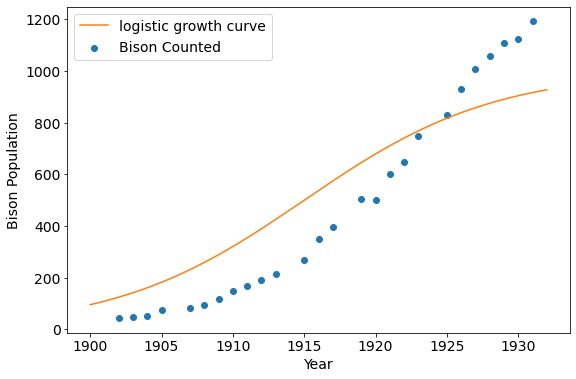

In [25]:
'''
Task: Experiment with this cell by changing the parameters of the logistic equation. 
'''
########Parameters of the logistic equation, change these so that the curve fits the data##########
t0= 1915 
k= 0.15
L= 1000 

###################################################################################################

#load data from the github repository
url='https://raw.githubusercontent.com/gomes-lab/course-cs2770-2023sp/main/Data/bison_population.csv'
df= pd.read_csv(url)

t=np.linspace(1900,1932,num=1000)
f=L/(1+np.exp(-k*(t-t0)))

exp=np.exp(k*t)
# plot the data points and the curve
plt.figure(figsize=(9,6))
plt.scatter(df['Year'],df['Bison Population'],label='Bison Counted')
plt.plot(t,f,'C1',label='logistic growth curve')
plt.xlabel('Year')
plt.ylabel('Bison Population')
plt.legend()
plt.show()